Enter the disk's initial head position: 78
Enter the total number of cylinders on the disk: 200
Enter the I/O requests (space-separated cylinder numbers): 84 34 63 27 76 155 166 131 174 4 3 7 198 157
Enter the initial direction of head movement ('left' for smaller, 'right' for larger track numbers): left
---------------------------------
Order of requests processed: [76, 63, 34, 27, 7, 4, 3, 84, 131, 155, 157, 166, 174, 198]
Total seek time: 270


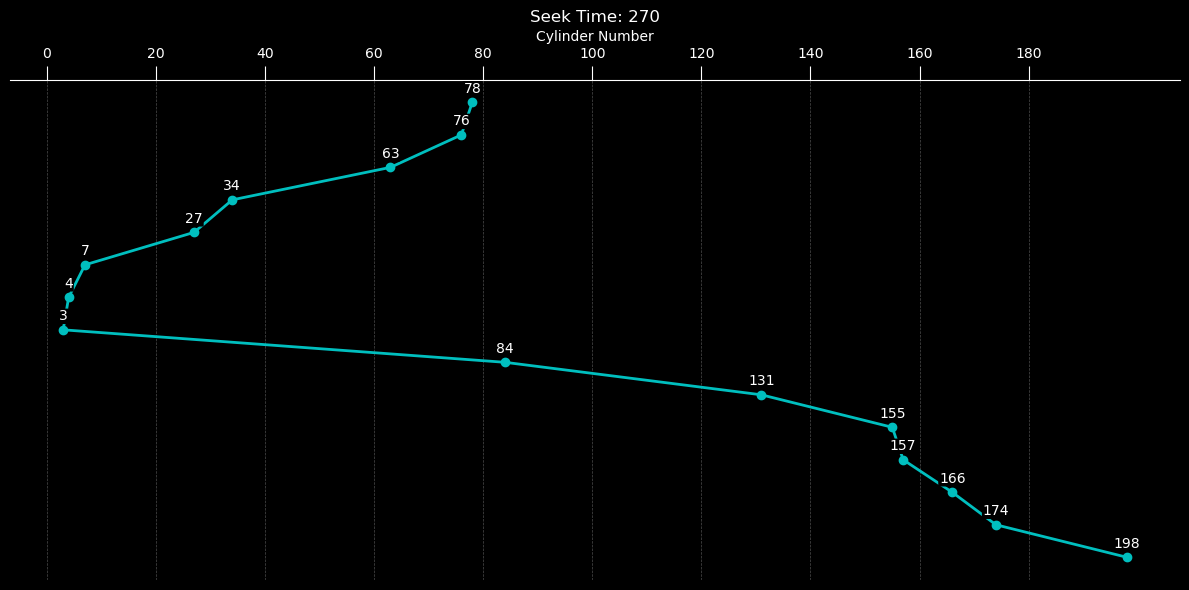

In [24]:
import matplotlib.pyplot as plt

def look_disk_scheduling(initial_head, total_cylinders, requests, initial_direction):
    # Sort requests
    requests = sorted(requests)

    # Split requests into left and right of the initial head position
    left = [req for req in requests if req < initial_head]
    right = [req for req in requests if req >= initial_head]

    # Determine the order of requests based on the initial direction
    if initial_direction == 'right':
        order = right + left[::-1]  # Process requests to the right first, then reverse left
    else:  # initial_direction == 'left'
        order = left[::-1] + right  # Process requests to the left first, then reverse right

    # Calculate total seek time
    seek_time = 0
    current_position = initial_head
    positions = [initial_head]  # List to track positions

    # Calculate total seek time and update positions
    for req in order:
        seek_time += abs(req - current_position)  # Distance between current and requested position
        current_position = req  # Update current position
        positions.append(req)

    return order, seek_time, positions

def plot_disk_movement(positions, seek_time, save_path=None):
    # Create a figure with a specific size and background color
    plt.figure(figsize=(12, 6), facecolor='#000000')

    # Plot the disk head movement
    plt.plot(positions, range(len(positions)-1, -1, -1), marker='o', color='c', linestyle='-', linewidth=2, label='On Track')

    # Annotate each position
    for i, pos in enumerate(positions):
        plt.text(pos, len(positions) - i - 1 + 0.2, f'{pos}', fontsize=10, ha='center', va='bottom', color='white',
                 bbox=dict(facecolor='black', boxstyle='round,pad=0.001'))

    # Set title and labels
    plt.title(f'Seek Time: {seek_time}', color='white')
    plt.xlabel('Cylinder Number', color='white')

    # Show grid lines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='white', alpha=0.3)

    # Customize axes
    ax = plt.gca()
    ax.tick_params(axis='x', length=10, which='both', labelbottom=False, bottom=False, top=True, labeltop=True, color='white')
    ax.xaxis.set_label_position('top')
    ax.set_facecolor("black")
    ax.spines['top'].set_color('white')

    # Hide y-axis
    plt.gca().axes.get_yaxis().set_visible(False)

    # Set x-axis ticks in increments of 20
    max_pos = max(positions)
    ticks = range(0, max_pos + 1, 20)
    plt.xticks(ticks, color='white')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Inputs
initial_head = int(input("Enter the disk's initial head position: "))
total_cylinders = int(input("Enter the total number of cylinders on the disk: "))
requests = list(map(int, input("Enter the I/O requests (space-separated cylinder numbers): ").split()))
initial_direction = input("Enter the initial direction of head movement ('left' for smaller, 'right' for larger track numbers): ").strip().lower()

# Input Validation
if initial_head < 0 or initial_head >= total_cylinders:
    print("Error: Initial head position must be within the range of 0 to total_cylinders - 1.")
elif any(req < 0 or req >= total_cylinders for req in requests):
    print("Error: All requests must be within the range of 0 to total_cylinders - 1.")
elif initial_direction not in ['left', 'right']:
    print("Error: Initial direction must be either 'left' or 'right'.")
else:
    # Run the disk scheduling algorithm
    order, seek_time, positions = look_disk_scheduling(initial_head, total_cylinders, requests, initial_direction)

    # Output results
    print("---------------------------------")
    print("Order of requests processed:", order)
    print("Total seek time:", seek_time)

    # Plot the disk head movement
    plot_disk_movement(positions, seek_time)